# Caracterizando al cluster de clientes numero 3

Gracias a la tabla de Características Distintivas sabemos de este grupo que:

1. Son clientes que estan suscritos, aplicaron descuentos y usaron codigos promocionales 
2. Son del estado de Indiana
3. Los articulos que compran son: sombreros, pantalones, vestidos, sudaderas con capucha, mochilas, pantalones vaqueros, guantes, cinturón,camisetas, bolsos, gafas de sol, faldas

Gracias a la tabla de Análisis Comparativo del Clúster 1 vs. Otros Clústeres sabemos de este grupo que:

1. Para las variables Age y Review Rating no existen grupos con media, mediana y dispersion menores que este grupo 

2. Para la variable Purchase Amount (USD) solo el cluster 0 (grupo 1) tiene menor mediana y media y en cuanto a dispersion no existen grupos con menor dipersion que esta variable

3. Para la variable Previous Purchases solo el cluster 4 (grupo 5) tiene menor mediana y media y en cuanto a dispersion no existen grupos con menor dipersion que esta variable
 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, kruskal, mannwhitneyu

df_customer = pd.read_csv("dataset/segmented_customers.csv")
# df_customer.head()

# Filtramos el DataFrame para el Clúster 3 (etiquetado como 2) 
df_cluster_3 = df_customer[df_customer['Cluster'] == 2].copy()

#### Pregunta 1: ¿Existe alguna diferencia o preferencia en el género por los artículos comprados en el Clúster 3?

In [13]:
list_of_items = ['Hat', 'Pants', 'Dress', 'Hoodie', 'Backpack', 'Jeans', 'Gloves', 'Belt', 'T-shirt', 'Handbag', 'Sunglasses', 'Skirt']
df_filtered_items = df_cluster_3[df_cluster_3['Item Purchased'].isin(list_of_items)].copy()

# Paso 2: Crear una tabla de contingencia
contingency_table = pd.crosstab(df_filtered_items['Gender'], df_filtered_items['Item Purchased'])
print("### Tabla de Contingencia de Género vs. Artículos Específicos en el Clúster 3 ###\n")
print(contingency_table.to_markdown())

### Tabla de Contingencia de Género vs. Artículos Específicos en el Clúster 3 ###

| Gender   |   Backpack |   Belt |   Dress |   Gloves |   Handbag |   Hat |   Hoodie |   Jeans |   Pants |   Skirt |   Sunglasses |   T-shirt |
|:---------|-----------:|-------:|--------:|---------:|----------:|------:|---------:|--------:|--------:|--------:|-------------:|----------:|
| Male     |         63 |     68 |      75 |       60 |        61 |    77 |       68 |      54 |      81 |      61 |           63 |        59 |


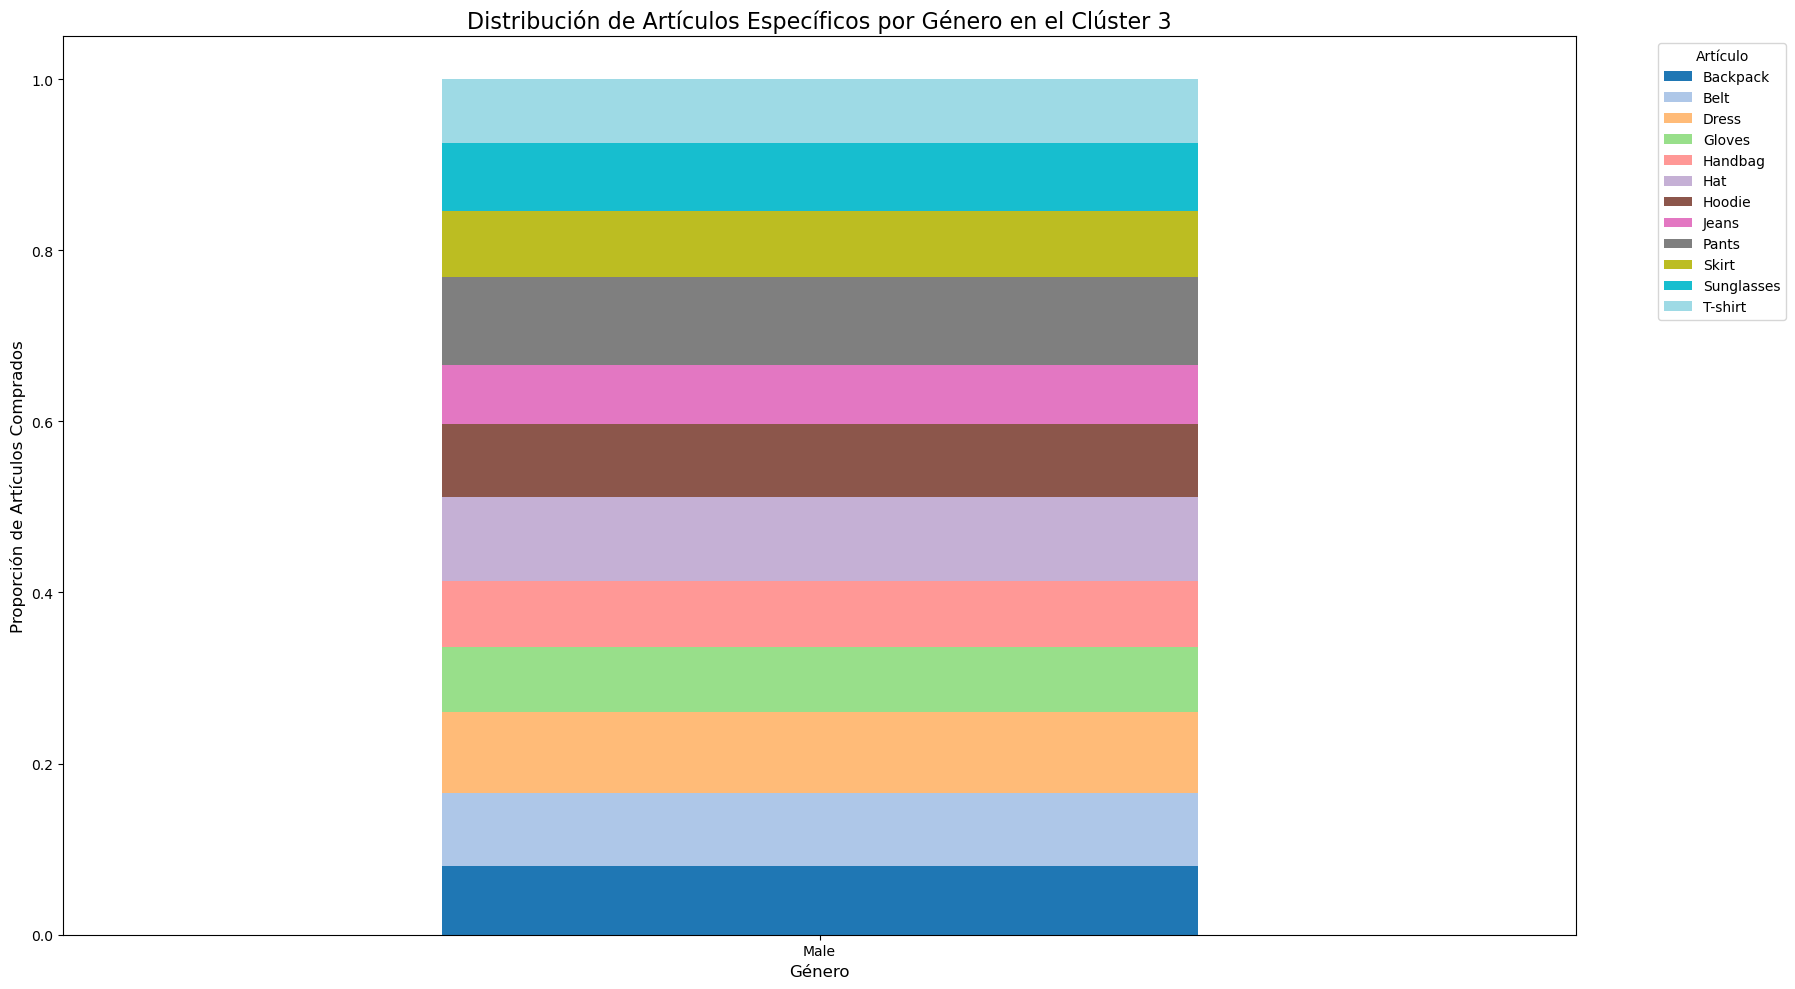

In [14]:
# Paso 3: Visualizar la relación con un gráfico de barras apiladas
contingency_normalized = contingency_table.div(contingency_table.sum(1).astype(float), axis=0)
contingency_normalized.plot(kind='bar', stacked=True, figsize=(18, 10), colormap='tab20')

plt.title('Distribución de Artículos Específicos por Género en el Clúster 3', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Proporción de Artículos Comprados', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Artículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Conclusion:

Como se puede observar en la tabla de contingencia generada, el Clúster 3 está compuesto exclusivamente por clientes del género masculino. Por esta razón, la tabla solo presenta una fila para Male y no hay datos para comparar con el género femenino.

Este hallazgo refuerza la conclusión del análisis de las variables demográficas del clúster, donde ya se había determinado que este segmento de clientes es homogéneo en cuanto a género. En consecuencia, la prueba de Chi-cuadrado de Independencia no es aplicable, ya que no hay una segunda variable de género con la cual contrastar la compra de los artículos.

#### Pregunta 2: ¿Influye el descuento aplicado en la calificación de la reseña?

Este análisis busca determinar si la aplicación de un descuento tiene un impacto significativo en la calificación que los clientes otorgan a sus compras (`Review Rating`). Utilizaremos la prueba no paramétrica de Mann-Whitney U para comparar las distribuciones de las calificaciones en los grupos con y sin descuento.

**Hipótesis:**
* **Hipótesis Nula ($H_0$):** No hay diferencia en las medianas de las calificaciones de las reseñas entre los clientes que recibieron un descuento y los que no.
* **Hipótesis Alternativa ($H_a$):** Existe una diferencia en las medianas de las calificaciones de las reseñas entre los clientes que recibieron un descuento y los que no.


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_13916\3525400954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Applied', y='Review Rating', data=df_customer, palette=['#66c2a5', '#fc8d62'])


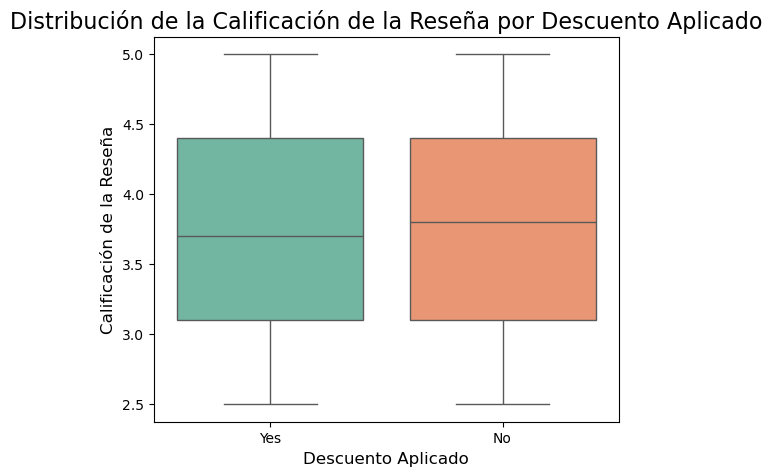

In [15]:
# Paso 1: Crear una visualización (Box Plot) con colores
plt.figure(figsize=(6, 5))
# Usamos el parámetro `palette` para definir los dos colores del gráfico.
sns.boxplot(x='Discount Applied', y='Review Rating', data=df_customer, palette=['#66c2a5', '#fc8d62'])

# Añadimos títulos y etiquetas para mayor claridad
plt.title('Distribución de la Calificación de la Reseña por Descuento Aplicado', fontsize=16)
plt.xlabel('Descuento Aplicado', fontsize=12)
plt.ylabel('Calificación de la Reseña', fontsize=12)

# Mostramos el gráfico
plt.show()

In [16]:
# Paso 2: Preparar los datos
# Separar los datos de 'Review Rating' en dos grupos
rating_with_discount = df_customer[df_customer['Discount Applied'] == 'Yes']['Review Rating']
rating_no_discount = df_customer[df_customer['Discount Applied'] == 'No']['Review Rating']

# Paso 3: Realizar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(rating_with_discount, rating_no_discount)

# Paso 4: Imprimir los resultados en formato Markdown con LaTeX
print("### Resultados de la Prueba de Mann-Whitney U ###")
print(f"| Estadística de Mann-Whitney U | Valor p |")
print(f"|----------------|----------|")
print(f"| ${stat:.4f}$ | ${p_value:.4f}$ |")
print("\n---")

# Paso 5: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value < alpha:
    print(f"**El valor p (${p_value:.4f}$) es menor que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una diferencia estadísticamente significativa en las calificaciones de las reseñas entre los clientes que recibieron un descuento y los que no. La mediana de las calificaciones es diferente para ambos grupos.")
else:
    print(f"**El valor p (${p_value:.4f}$) es mayor o igual que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una diferencia estadísticamente significativa en las calificaciones de las reseñas entre los clientes que recibieron un descuento y los que no.")


### Resultados de la Prueba de Mann-Whitney U ###
| Estadística de Mann-Whitney U | Valor p |
|----------------|----------|
| $1837323.0000$ | $0.4434$ |

---

### Interpretación del Resultado ###
**El valor p ($0.4434$) es mayor o igual que el nivel de significancia de $0.05$.**
**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una diferencia estadísticamente significativa en las calificaciones de las reseñas entre los clientes que recibieron un descuento y los que no.


Conclusión del Análisis

Basándonos en la prueba de Mann-Whitney U, se concluye que no existe una diferencia estadísticamente significativa en las calificaciones de las reseñas entre los clientes que recibieron un descuento y aquellos que no lo recibieron.

Dado que el valor p (0.4434) es mayor que el nivel de significancia de 0.05, no podemos rechazar la hipótesis nula. Esto sugiere que, según los datos analizados, la aplicación de un descuento no influye de manera determinante en la calificación de la reseña.

#### Pregunta 3: ¿Existe alguna diferencia entre los clientes suscritos y los que aplicaron un descuento?

In [17]:
# Paso 1: Crear la tabla de contingencia
contingency_table = pd.crosstab(df_customer['Subscription Status'], df_customer['Discount Applied'])
print(contingency_table)

Discount Applied       No   Yes
Subscription Status            
No                   2223   624
Yes                     0  1053


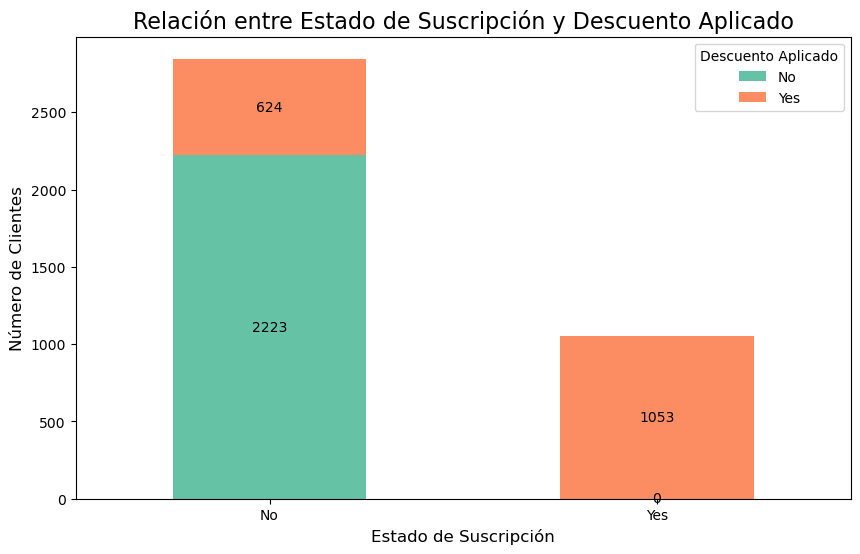

In [18]:
# Paso 2: Crear una visualización (Gráfico de barras apiladas)
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62'])
plt.title('Relación entre Estado de Suscripción y Descuento Aplicado', fontsize=16)
plt.xlabel('Estado de Suscripción', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Descuento Aplicado', loc='upper right')

# Añadir etiquetas de texto a las barras para mayor claridad
for i, status in enumerate(contingency_table.index):
    for j, discount in enumerate(contingency_table.columns):
        count = contingency_table.loc[status, discount]
        plt.text(i, count/2 if j == 0 else contingency_table.loc[status, 'No'] + count/2,
                 str(count), ha='center', va='center', fontsize=10)

plt.show()

In [19]:
# Paso 3: Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Paso 4: Imprimir los resultados en formato Markdown con LaTeX
print("### Resultados de la Prueba de Chi-cuadrado ###")
print(f"| Estadística de $\\chi^2$ | Valor p | Grados de Libertad (df) |")
print(f"|-------------|----------|-----|")
print(f"| ${chi2_stat:.4f}$ | ${p_value:.4f}$ | ${dof}$ |")
print("\n---")

# Paso 5: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value < alpha:
    print(f"**El valor p (${p_value:.4f}$) es menor que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una relación estadísticamente significativa entre el estado de suscripción de un cliente y la aplicación de un descuento. Las variables no son independientes.")
else:
    print(f"**El valor p (${p_value:.4f}$) es mayor o igual que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una relación estadísticamente significativa entre el estado de suscripción de un cliente y la aplicación de un descuento. Las variables son independientes.")


### Resultados de la Prueba de Chi-cuadrado ###
| Estadística de $\chi^2$ | Valor p | Grados de Libertad (df) |
|-------------|----------|-----|
| $1908.9214$ | $0.0000$ | $1$ |

---

### Interpretación del Resultado ###
**El valor p ($0.0000$) es menor que el nivel de significancia de $0.05$.**
**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una relación estadísticamente significativa entre el estado de suscripción de un cliente y la aplicación de un descuento. Las variables no son independientes.


Conclusión 

Basándonos en la prueba de Chi-cuadrado, se concluye que existe una relación estadísticamente significativa entre el estado de suscripción y la aplicación de un descuento.

Dado que el valor p (0.0000) es menor que el nivel de significancia de 0.05, rechazamos la hipótesis nula. Esto sugiere que las variables Subscription Status y Discount Applied no son independientes, lo que significa que el estado de suscripción de un cliente tiene un impacto en si se le aplica o no un descuento.

#### Pregunta 4: ¿Influye el uso de un código promocional en el hecho de estar suscritos (`Subscription Status`)?

In [20]:
# Paso 1: Crear la tabla de contingencia
contingency_table1 = pd.crosstab(df_customer['Subscription Status'], df_customer['Promo Code Used'])
print(contingency_table1)

Promo Code Used        No   Yes
Subscription Status            
No                   2223   624
Yes                     0  1053


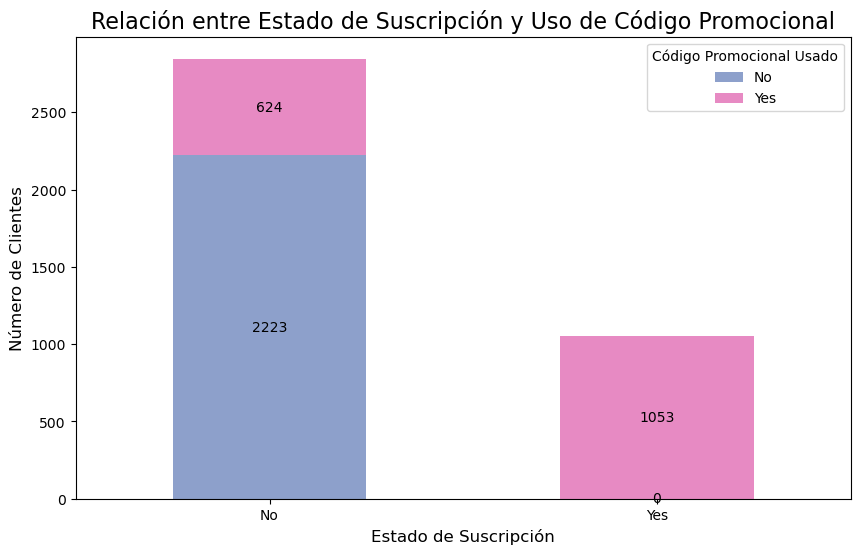

In [21]:
# Paso 2: Crear una visualización (Gráfico de barras apiladas)
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#8da0cb', '#e78ac3'])
plt.title('Relación entre Estado de Suscripción y Uso de Código Promocional', fontsize=16)
plt.xlabel('Estado de Suscripción', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Código Promocional Usado', loc='upper right')

# Añadir etiquetas de texto a las barras para mayor claridad
for i, status in enumerate(contingency_table.index):
    for j, promo in enumerate(contingency_table.columns):
        count = contingency_table.loc[status, promo]
        plt.text(i, count/2 if j == 0 else contingency_table.loc[status, 'No'] + count/2,
                 str(count), ha='center', va='center', fontsize=10)

plt.show()

In [22]:
# Paso 3: Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Paso 4: Imprimir los resultados en formato Markdown con LaTeX
print("### Resultados de la Prueba de Chi-cuadrado ###")
print(f"| Estadística de $\\chi^2$ | Valor p | Grados de Libertad (df) |")
print(f"|-------------|----------|-----|")
print(f"| ${chi2_stat:.4f}$ | ${p_value:.4f}$ | ${dof}$ |")
print("\n---")

# Paso 5: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value < alpha:
    print(f"**El valor p (${p_value:.4f}$) es menor que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una relación estadísticamente significativa entre el estado de suscripción de un cliente y el uso de un código promocional. Las variables no son independientes.")
else:
    print(f"**El valor p (${p_value:.4f}$) es mayor o igual que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una relación estadísticamente significativa entre el estado de suscripción de un cliente y el uso de un código promocional. Las variables son independientes.")


### Resultados de la Prueba de Chi-cuadrado ###
| Estadística de $\chi^2$ | Valor p | Grados de Libertad (df) |
|-------------|----------|-----|
| $1908.9214$ | $0.0000$ | $1$ |

---

### Interpretación del Resultado ###
**El valor p ($0.0000$) es menor que el nivel de significancia de $0.05$.**
**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una relación estadísticamente significativa entre el estado de suscripción de un cliente y el uso de un código promocional. Las variables no son independientes.


Conclusión 

El análisis estadístico revela una relación extremadamente fuerte y significativa entre el uso de un código promocional y el estado de suscripción de los clientes.

El valor p de 0.0000 nos indica que es prácticamente imposible que esta relación sea producto del azar. En lugar de ser variables independientes, el uso de un código promocional está directamente asociado a la probabilidad de que un cliente esté suscrito.

Esto sugiere que los códigos promocionales no son solo una herramienta de marketing puntual, sino que son altamente efectivos para atraer y convertir clientes hacia un estado de suscripción activa.

#### Pregunta 5: ¿Existe una relación estadísticamente significativa entre la edad de los clientes y los artículos que compran dentro del Clúster 2?

Para responder a esta pregunta, utilizaremos una prueba de Chi-cuadrado sobre una tabla de contingencia que cruce los grupos de edad con los artículos comprados. Esto nos permitirá determinar si la preferencia por ciertos productos está influenciada por la edad de los clientes en este segmento.

In [27]:
# === PASO 1: DIVIDIR LA EDAD EN GRUPOS CON EL RANGO 18-70 ===
# Dividimos la columna 'Age' de df_cluster_3 en grupos (bins).
# Ajustamos los rangos de edad para ir de 18 a 70.
bins = [18, 25, 35, 50, 70]
labels = ['18-25', '26-35', '36-50', '51-70']

# Usamos pd.cut para crear la nueva columna 'Age_Group'
df_cluster_3['Age_Group'] = pd.cut(df_cluster_3['Age'], bins=bins, labels=labels, right=False)

# === PASO 2: CREAR LA TABLA DE CONTINGENCIA ===
# Analizamos la relación entre 'Age_Group' y 'Item Purchased'
# Usamos el nombre de columna correcto proporcionado por el usuario
contingency_table2 = pd.crosstab(df_cluster_3['Age_Group'], df_cluster_3['Item Purchased'])
print("### Tabla de Contingencia para el Clúster 2:")
print(contingency_table2)
print("\n" + "="*50 + "\n")

### Tabla de Contingencia para el Clúster 2:
Item Purchased  Backpack  Belt  Blouse  Dress  Gloves  Handbag  Hat  Hoodie  \
Age_Group                                                                     
18-25                  5     8       6      7       7       11    6       9   
26-35                 20    16       8     12      16        9   18      12   
36-50                 18    21      15     26      14       12   26      20   
51-70                 20    22      25     30      22       27   26      26   

Item Purchased  Jeans  Pants  Sandals  Skirt  Socks  Sunglasses  T-shirt  
Age_Group                                                                 
18-25               9     11        6     10      9           5        6  
26-35              10     16        9      6     10          13       15  
36-50              17     26       21      8      9          10       13  
51-70              18     26       20     36     18          35       25  




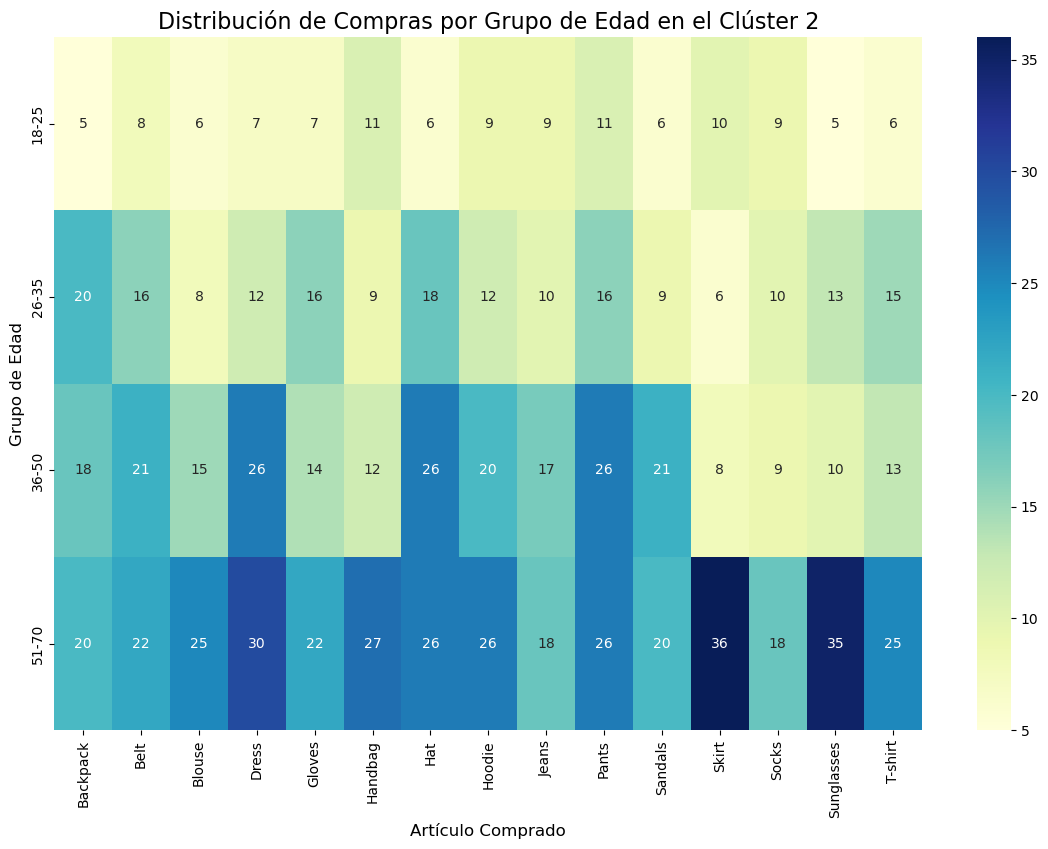

In [29]:
# Visualización con un mapa de calor
plt.figure(figsize=(14, 9))
sns.heatmap(contingency_table2, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribución de Compras por Grupo de Edad en el Clúster 2', fontsize=16)
plt.xlabel('Artículo Comprado', fontsize=12)
plt.ylabel('Grupo de Edad', fontsize=12)
plt.show()

In [30]:
# === PASO 4: INTERPRETACIÓN Y VISUALIZACIÓN ===
print("### Interpretación del resultado:")
alpha = 0.05
if p_value < alpha:
    print(f"El valor p ({p_value:.4f}) es menor que el nivel de significancia de {alpha}.")
    print("Conclusión: Rechazamos la hipótesis nula. Existe una relación estadísticamente significativa entre la edad y los artículos comprados dentro de este clúster.")
else:
    print(f"El valor p ({p_value:.4f}) es mayor que el nivel de significancia de {alpha}.")
    print("Conclusión: No podemos rechazar la hipótesis nula. No hay evidencia de una relación significativa entre la edad y los artículos comprados dentro de este clúster.")


### Interpretación del resultado:
El valor p (0.0000) es menor que el nivel de significancia de 0.05.
Conclusión: Rechazamos la hipótesis nula. Existe una relación estadísticamente significativa entre la edad y los artículos comprados dentro de este clúster.


Conclusión del Análisis del Clúster 2

A partir del análisis de Chi-cuadrado y la visualización del mapa de calor, se observa una relación estadísticamente significativa entre la edad de los clientes y los artículos que compran dentro del Clúster 2. El valor p (0.0000) confirma que la distribución de compras no es aleatoria entre los diferentes grupos de edad.

El mapa de calor proporciona información clave sobre los patrones de compra específicos:

1. Grupo de 18-25 años: Tienden a comprar una variedad de artículos, pero no muestran una preferencia marcada por un solo tipo. Sus compras son más uniformes a través de todas las categorías.

2. Grupo de 26-35 años: Muestran una preferencia notable por artículos como Backpack y Pants.

3. Grupo de 36-50 años: Tienen una alta preferencia por Hat y Pants, lo que los distingue de los grupos más jóvenes.

4. Grupo de 51-70 años: Este grupo destaca por su alto número de compras en casi todas las categorías, con una marcada preferencia por Dress, Hat, Sandals y Sunglasses.

En resumen, los hallazgos demuestran que la edad es un factor determinante en el comportamiento de compra de los clientes en este clúster. La segmentación por edad puede ser utilizada para campañas de marketing más dirigidas, ofreciendo productos específicos a cada grupo para maximizar el retorno de la inversión. Por ejemplo, una campaña para T-shirt o Skirt podría enfocarse en el grupo de 51-70 años, mientras que una para Pants sería efectiva en los grupos de 26-35 y 36-50 años.

#### Pregunta 6: ¿Influye la edad de los clientes en el método de pago que eligen?
Para explorar esta cuestión, realizaremos una prueba de Chi-cuadrado sobre una tabla de contingencia que cruce la edad (Age) con el método de pago (Payment Method). Esto nos ayudará a determinar si la elección del método de pago es independiente de la edad del cliente.

In [31]:
# A partir de la columna 'Age' (edad numérica), creamos la nueva columna
# 'Age_Group' que contiene los rangos de edad, lo cual es necesario para
# la prueba de Chi-cuadrado.
bins = [18, 25, 35, 50, 70]
labels = ['18-25', '26-35', '36-50', '51-70']
df_cluster_3['Age_Group'] = pd.cut(df_cluster_3['Age'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia para el Clúster 3
print("# Tabla de Contingencia: Grupos de Edad vs. Métodos de Pago (Clúster 3)")
contingency_table = pd.crosstab(df_cluster_3['Age_Group'], df_cluster_3['Payment Method'])
print(contingency_table)
print("\n" + "="*70 + "\n")

# Tabla de Contingencia: Grupos de Edad vs. Métodos de Pago (Clúster 3)
Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  PayPal  Venmo
Age_Group                                                                  
18-25                      18    20           22          19      17     19
26-35                      24    34           37          31      34     30
36-50                      52    31           48          42      44     39
51-70                      64    75           76          52      49     60




# Mapa de Calor: Distribución de Clientes por Edad y Método de Pago


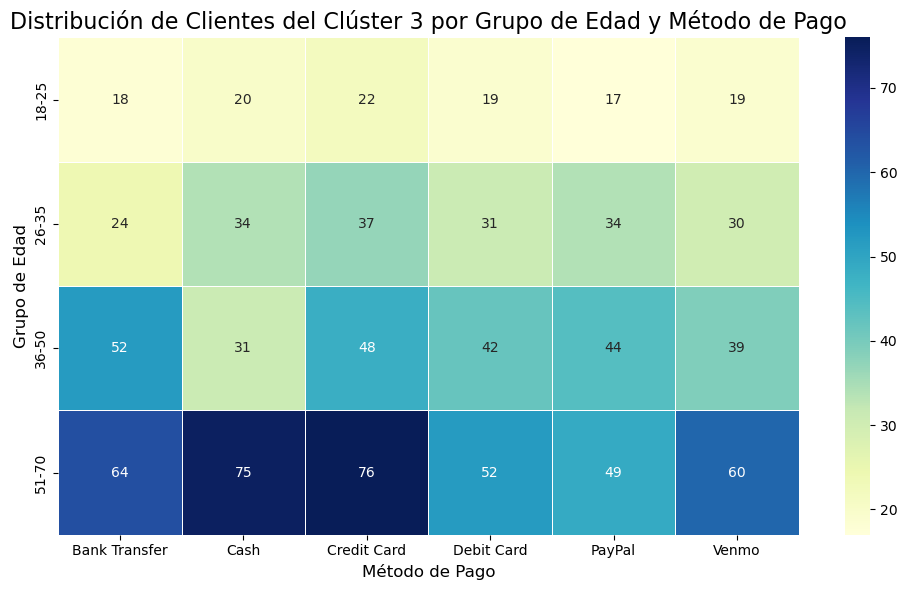

In [32]:
# ---- Inicio: Visualización del mapa de calor ----
print("# Mapa de Calor: Distribución de Clientes por Edad y Método de Pago")

# Crear el mapa de calor con Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Distribución de Clientes del Clúster 3 por Grupo de Edad y Método de Pago', fontsize=16)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Grupo de Edad', fontsize=12)
plt.tight_layout()
plt.show()


In [33]:
# Realizar la prueba de Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir los resultados de la prueba
print("# Resultados de la Prueba de Chi-cuadrado para el Clúster 3")
print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad (DOF): {dof}")

# Interpretación de los resultados
alpha = 0.05
print("\n# Conclusión del Análisis")
if p_value < alpha:
    print(f"Dado que el valor p ({p_value:.4f}) es menor que el nivel de significancia "
          f"({alpha}), rechazamos la hipótesis nula.")
    print("Para el Clúster 3, hay evidencia suficiente para afirmar que existe una relación "
          "estadísticamente significativa entre la edad de los clientes y el método de pago que eligen.")
else:
    print(f"Dado que el valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia "
          f"({alpha}), no podemos rechazar la hipótesis nula.")
    print("Para el Clúster 3, no hay evidencia suficiente para afirmar que la edad de los "
          "clientes influye en la elección del método de pago.")
print("\n" + "="*70 + "\n")

# Mostrar una tabla resumen en formato Markdown para Jupyter
results_df = pd.DataFrame({
    'Métrica': ['Estadístico Chi-cuadrado', 'Valor p', 'Grados de Libertad'],
    'Valor': [f"{chi2:.4f}", f"{p_value:.4f}", dof]
})
print("### Resumen de la Prueba en formato Markdown")
print(results_df.to_markdown(index=False))

# Resultados de la Prueba de Chi-cuadrado para el Clúster 3
Estadístico Chi-cuadrado: 13.4693
Valor p: 0.5661
Grados de libertad (DOF): 15

# Conclusión del Análisis
Dado que el valor p (0.5661) es mayor o igual que el nivel de significancia (0.05), no podemos rechazar la hipótesis nula.
Para el Clúster 3, no hay evidencia suficiente para afirmar que la edad de los clientes influye en la elección del método de pago.


### Resumen de la Prueba en formato Markdown
| Métrica                  |   Valor |
|:-------------------------|--------:|
| Estadístico Chi-cuadrado | 13.4693 |
| Valor p                  |  0.5661 |
| Grados de Libertad       | 15      |


Conclusion:

No existe evidencia estadística suficiente para afirmar que la elección del método de pago esté relacionada con la edad de los clientes en este clúster. La distribución observada de los datos en la tabla de contingencia y el mapa de calor es similar a la que se esperaría si las dos variables fueran completamente independientes.

Esto sugiere que, para los clientes del Clúster 3, otros factores (como la conveniencia, la seguridad, o la disponibilidad de las opciones de pago) podrían ser más influyentes que la edad a la hora de elegir cómo pagar.